# Contour a map

This version of this notebook is adapted from [the original in the `xlines` repo](https://github.com/agilescientific/xlines/blob/master/notebooks/10_Contour_maps.ipynb).

The original accompanied [a post on the Agile Scientific blog](https://agilescientific.com/blog/2017/12/29/x-lines-of-python-contour-maps). 

---

We'll use the [Penobscot / Sable Island 3D seismic data](https://www.opendtect.org/osr/Main/PENOBSCOT3DSABLEISLAND) from offshore Nova Scotia, made available by the **Nova Scotia Department of Energy** and **dGB Earth Sciences**. The data is licensed CC BY-SA.

## Load the horizon

A 'horizon' is a surface, in this case it represents the seafloor. It was interpreted from 3D seismic reflection data, so the 'up and down' direction is measured in units of time, not depth. In particular, the units are milliseconds, ms. Deeper things take a longer time to reflect back to the measuring devices at the surface.

The data is in a space-delimited text file on GitHub; we can avoid downloading it by reading it into memory:

In [3]:
import urllib.request
import numpy as np

url = 'https://raw.githubusercontent.com/scienxlab/datasets/refs/heads/main/cnsopb/Penobscot_Seabed.txt'
with urllib.request.urlopen(url) as response:
    seabed = np.loadtxt(response)
seabed.shape

(601, 481)

Arguably the easiest way to visualize a 2D array is to make a raster of it, colouring the pizels using a table I'll call a **colourmap**. 

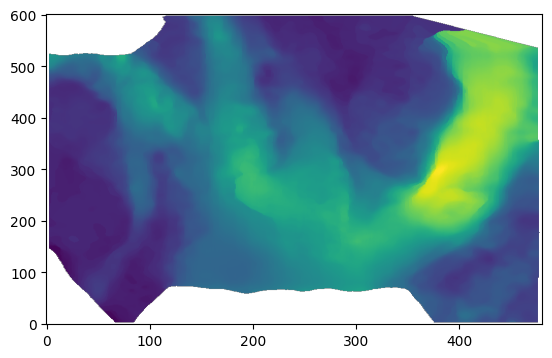

In [4]:
import matplotlib.pyplot as plt

plt.imshow(seabed, aspect=0.5, origin='lower')

We can make a fancier plot by adding some **labels** to the axes, and a **colorbar** (a legend showing the mapping from data values to colours).

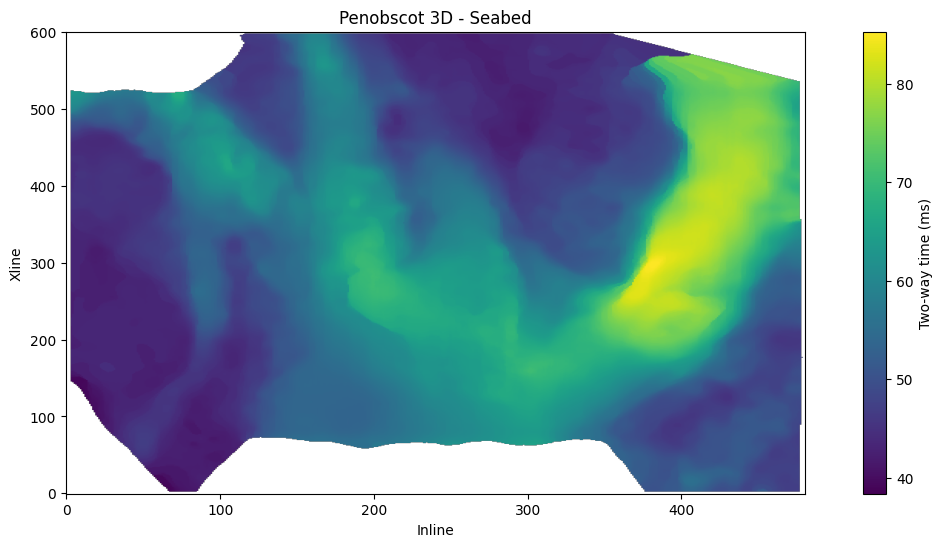

In [5]:
fig, ax = plt.subplots(figsize=(15,6))
im = ax.imshow(seabed, aspect=0.5, origin='lower')
cb = fig.colorbar(im, label="Two-way time (ms)")
ax.set_xlabel("Inline")
ax.set_ylabel("Xline")
ax.set_title("Penobscot 3D - Seabed")
plt.show()

Now we can see that the colourmap seems upside down for this data: the larger numbers (around 80 ms) are deeper in the ocean. Because of this:

- I want to flip the colourmap so that darker colours represent greater depths.
- I want to flip the colourbar as well, so that the larger numbers are at the bottom.

Furthermore, I think the colourmap could be improved. Matplotlib calls the colourmap `cmap`, and has lots of different ones to choose from, e.g. pass `cmap='Blues'` to `imshow()` and you get a nice blue&ndash;white gradient.

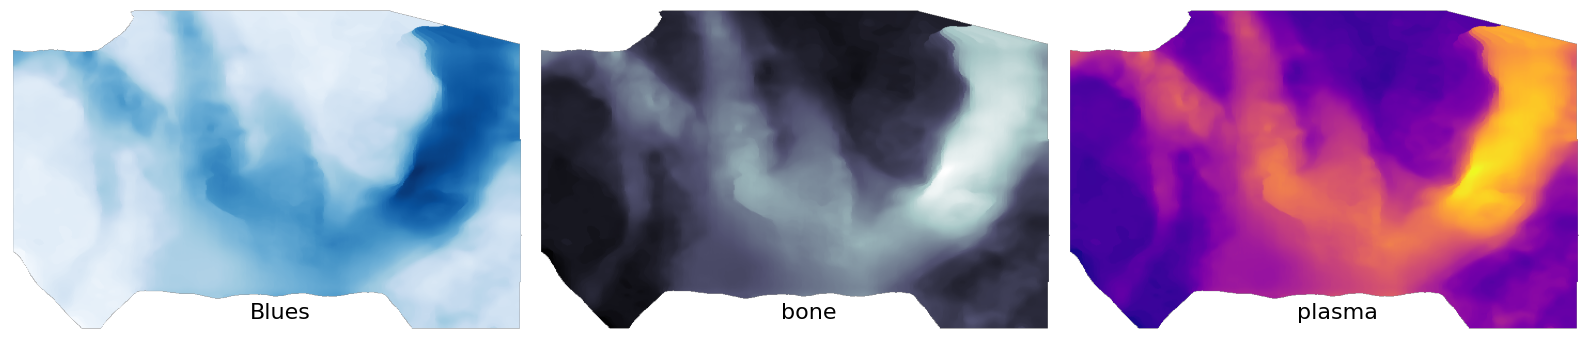

In [6]:
fig = plt.figure(figsize=(16, 4))

cmaps = ['Blues', 'bone', 'plasma']
for i, cmap in enumerate(cmaps):
    ax = fig.add_subplot(1, 3, i+1)
    plt.imshow(seabed, aspect=0.5, cmap=cmap, origin='lower')
    ax.axis('off')
    ax.text(253, 22, cmap, ha='center', size=16, color='black')

plt.tight_layout()
plt.show()

For this map, the colourmap called `'GnBu'` (a green&ndash;blue gradient) has a nice cartographic feel.

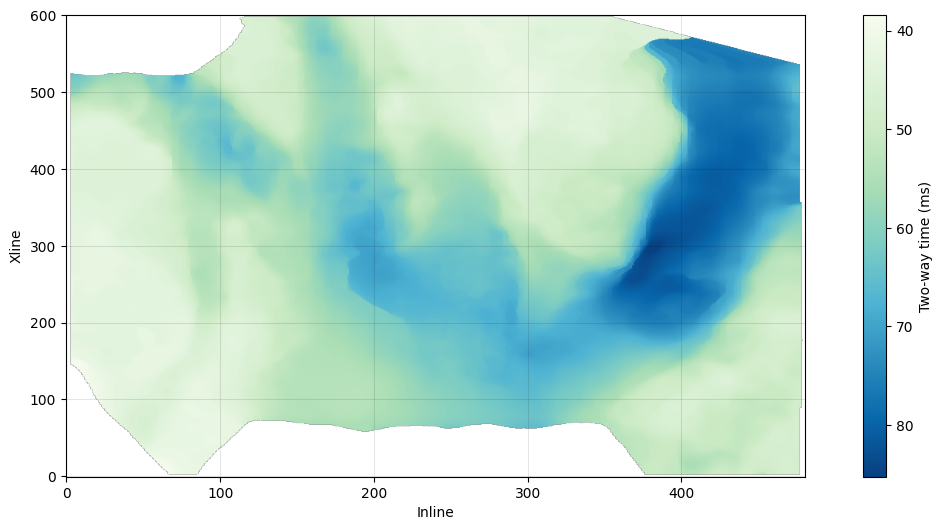

In [7]:
fig, ax = plt.subplots(figsize=(15,6))
im = ax.imshow(seabed, cmap='GnBu', aspect=0.5, origin='lower')
cb = fig.colorbar(im, label="Two-way time (ms)")
cb.ax.invert_yaxis()
ax.set_xlabel("Inline")
ax.set_ylabel("Xline")
ax.grid(c='k', alpha=0.1)

## Add contours

Drawing a contour map is quite straghtforward:

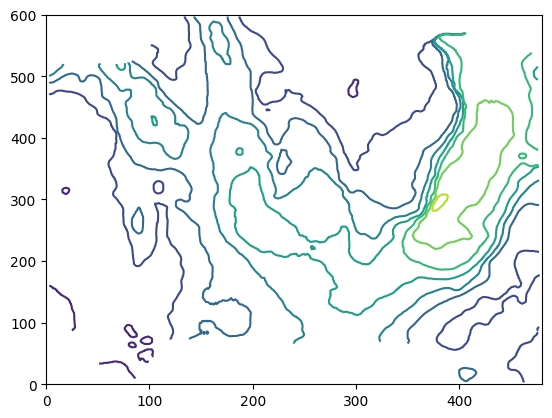

In [8]:
plt.contour(seabed)

Most of the time, you'll want to control the appearance of these contours. For a start, let's draw more of them. To do this, we'll compute the minimum `mi` and maximum `ma` values of the surface, then make an `arange` from the minimum to the maximum.

In [9]:
mi, ma = np.floor(np.nanmin(seabed)), np.ceil(np.nanmax(seabed))
levels = np.arange(mi, ma+2, 2)  # Add to `ma` to include it explicitly.

Now `levels` is an array of the levels at which we want contours:

In [10]:
levels

array([38., 40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60., 62.,
       64., 66., 68., 70., 72., 74., 76., 78., 80., 82., 84., 86.])

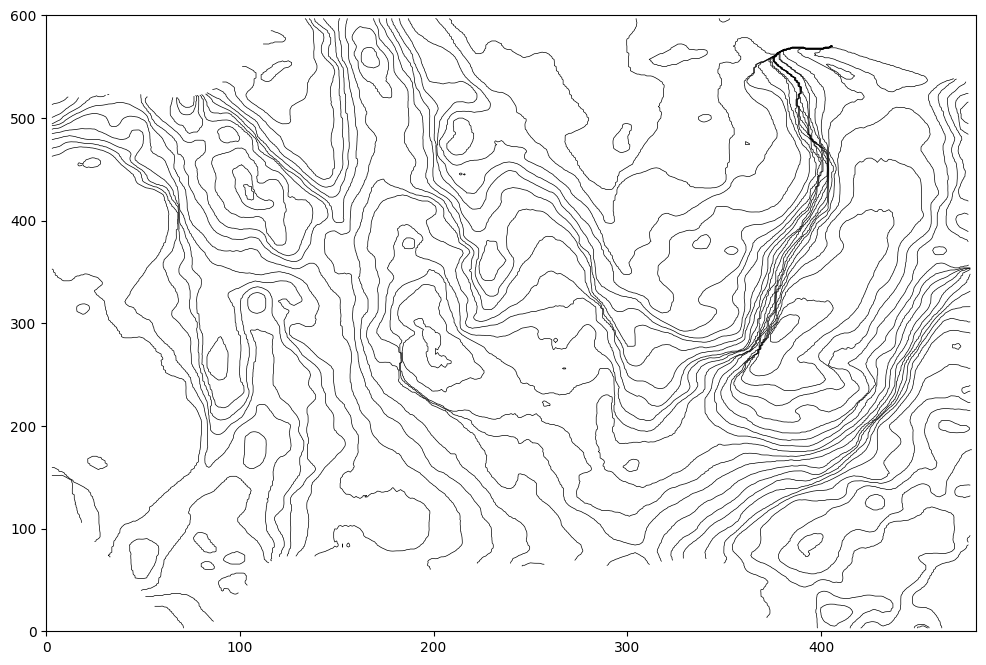

In [11]:
plt.figure(figsize=(12, 8))
plt.contour(seabed, levels=levels, linewidths=0.5, linestyles='solid', colors=['black'])

## Filled contours

For filled contours, we use another command, `contourf`:

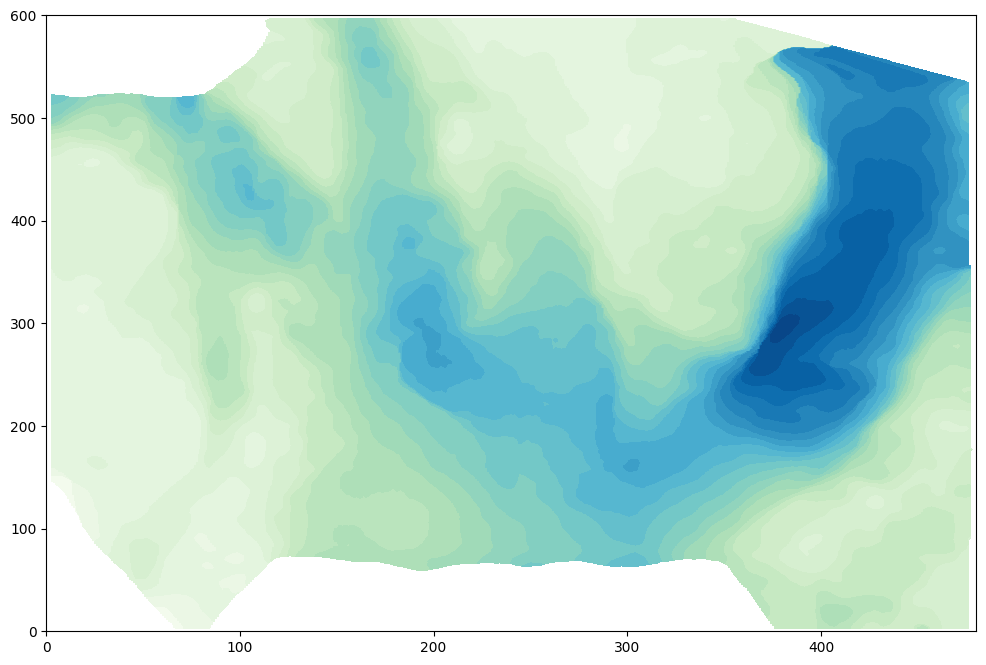

In [12]:
plt.figure(figsize=(12, 8))
plt.contourf(seabed, levels=levels, cmap='GnBu')

Unlike in MATLAB, this command does not plot the contours as well. To get both, we simply make two plots. I like to use black for contours, with a low opacity or `alpha` (i.e. mostly transparent).

Let's also add the `colorbar`:

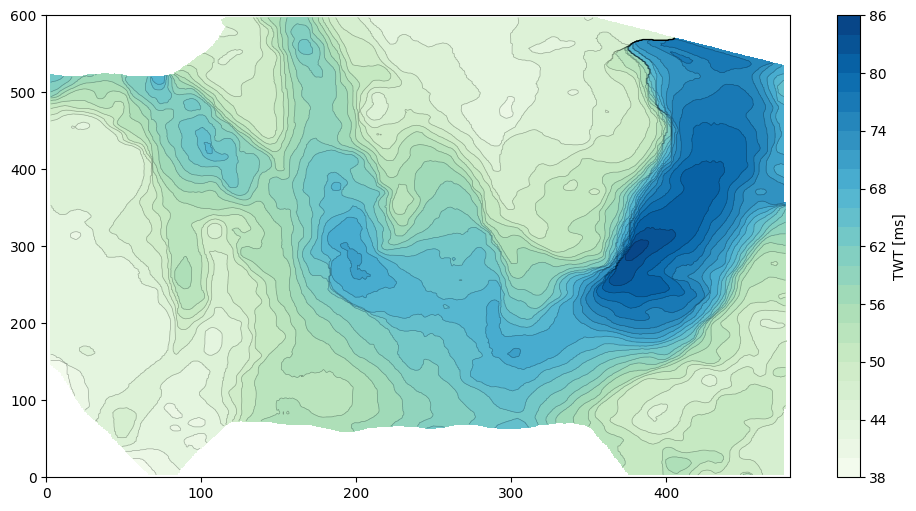

In [13]:
plt.figure(figsize=(12, 6))
plt.contour(seabed, levels=levels, linewidths=0.5, linestyles='solid', colors=['black'], alpha=0.3)
plt.contourf(seabed, levels=levels, cmap='GnBu')
plt.colorbar(label="TWT [ms]")

## Labeling contours

Note that some of the arguments for these plotting commands can take different types, depending on what we want to achieve. For example, I'm using a single linewidth of `0.5`, but if we want index contours, we can specify a tuple of linewidths (I'll redefine `levels` as well, to make this easier):

In [14]:
step = 2
levels = np.arange(10*(mi//10), ma+step, step)

In [15]:
lws = [0.5 if l%10 else 1 for l in levels]

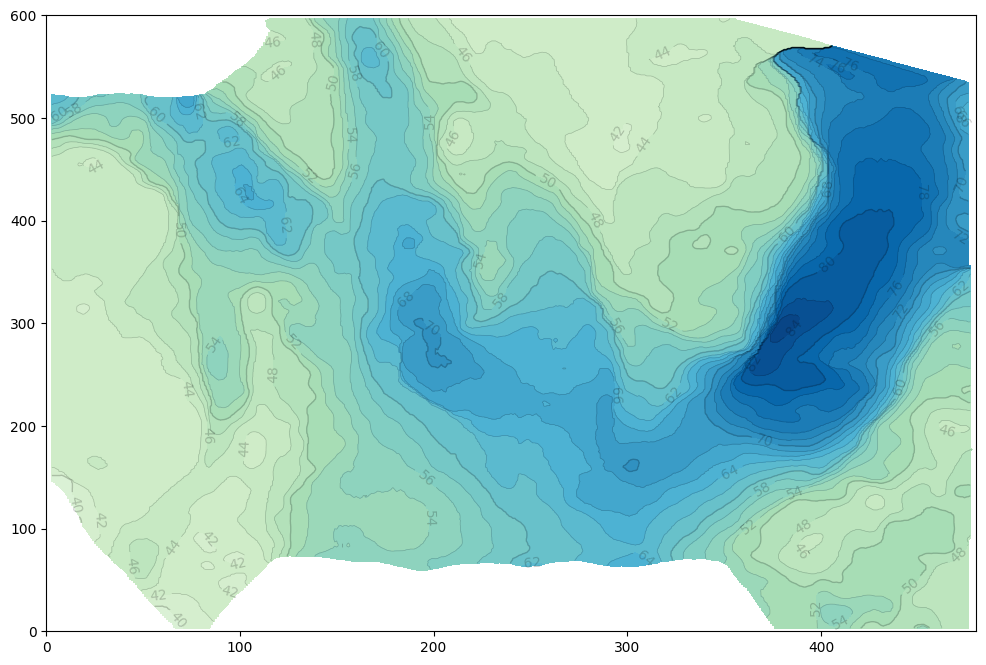

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.contourf(seabed, levels=levels, cmap='GnBu')
params = dict(linestyles='solid', colors=['black'], alpha=0.2)
cs = ax.contour(seabed, levels=levels, linewidths=lws, **params)
ax.clabel(cs, fmt='%d')
plt.show()

Notice that I switched to a slightly different pattern of `matplotlib` calls to do this plot. It's more verbose, but sometimes you need to be able to control things more finely. In fact, it's not a bad idea to make all your plots like this, if you're reasonably fast at typing.

## Publication-ready plot

Let's make a final plot, adding some annotation. We'll go back to using `imshow` for the raster — I prefer the subtlety of the smooth colour ramp. And let's switch to a more naturalistic colourmap, given that this is a bathymetric surface. 

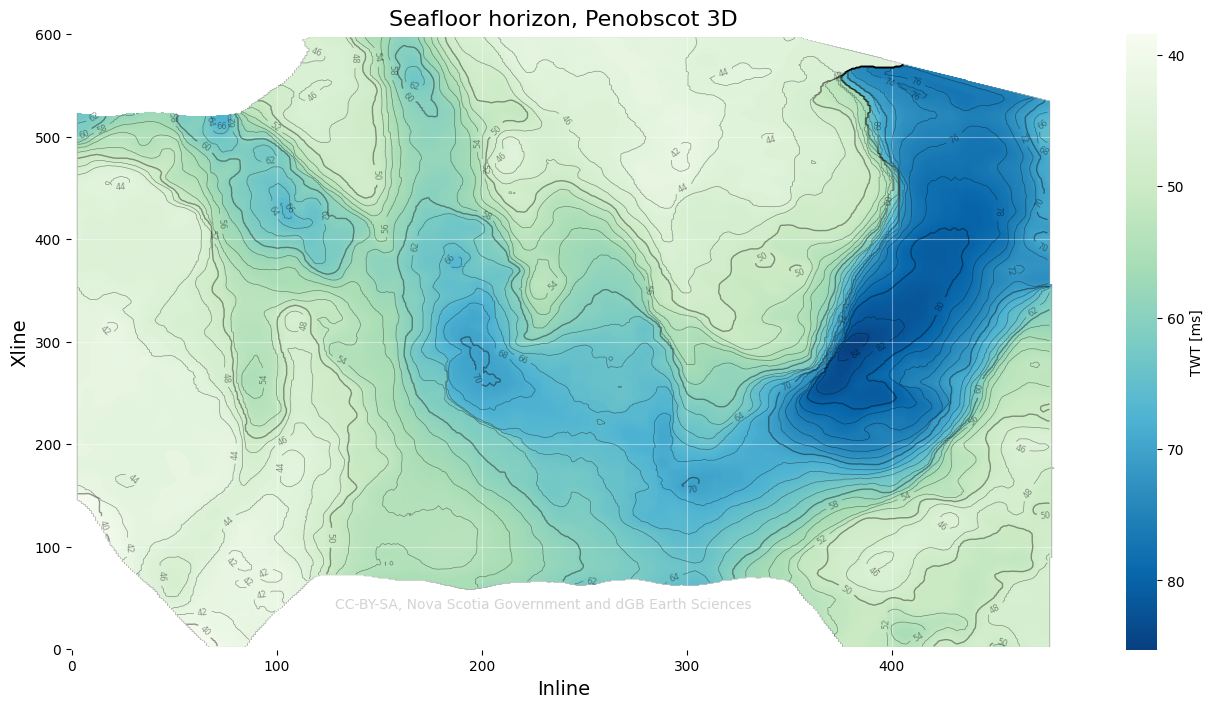

In [17]:
# Set up the figure.
fig, ax = plt.subplots(figsize=(18,8), facecolor='white')
ax.set_title("Seafloor horizon, Penobscot 3D", size=16)

# Plot the raster and colourbar.
im = ax.imshow(seabed, cmap='GnBu', aspect=0.5, origin='lower')
ax.set_xlabel("Inline", size=14); ax.set_ylabel("Xline", size=14)
cb = fig.colorbar(im, label="TWT [ms]")
cb.outline.set_visible(False)
cb.ax.invert_yaxis()

# Plot the contours.
cs = ax.contour(seabed, levels=levels, linewidths=lws, linestyles='solid', colors=[(0,0,0,0.4)])
ax.clabel(cs, fmt='%d', fontsize=6)

# Finish up.
text = "CC-BY-SA, Nova Scotia Government and dGB Earth Sciences"
ax.text(230, 40, text, ha='center', color='lightgray')
ax.grid(color='w', alpha=0.4)
plt.setp([ax.spines.values()], color='none')
plt.show()

<hr />

© 2025 Matt Hall, licensed CC BY-SA